In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression

In [16]:
# Load dataset
df = pd.read_csv("C:\\Users\\angel\\OneDrive\\Desktop\\WildBlueberryPollinationSimulationData.csv")

In [17]:
# Data Cleaning and preparation

# Identify missing values
missing_values = df.isnull().sum()

# Handle missing values
df = df.dropna()  

In [18]:
# Define features and target
X = df.drop('yield', axis=1)
y = df['yield']

In [19]:
# Save the cleaned dataset
df.to_csv('C:\\Users\\angel\\OneDrive\\Desktop\\WildBlueberryPollinationSimulationData.csv', index=False)

In [20]:
# Descriptive statistics
print(df.describe())

             Row#   clonesize    honeybee     bumbles     andrena       osmia  \
count  777.000000  777.000000  777.000000  777.000000  777.000000  777.000000   
mean   388.000000   18.767696    0.417133    0.282389    0.468817    0.562062   
std    224.444871    6.999063    0.978904    0.066343    0.161052    0.169119   
min      0.000000   10.000000    0.000000    0.000000    0.000000    0.000000   
25%    194.000000   12.500000    0.250000    0.250000    0.380000    0.500000   
50%    388.000000   12.500000    0.250000    0.250000    0.500000    0.630000   
75%    582.000000   25.000000    0.500000    0.380000    0.630000    0.750000   
max    776.000000   40.000000   18.430000    0.585000    0.750000    0.750000   

       MaxOfUpperTRange  MinOfUpperTRange  AverageOfUpperTRange  \
count        777.000000        777.000000            777.000000   
mean          82.277091         49.700515             68.723037   
std            9.193745          5.595769              7.676984   
mi

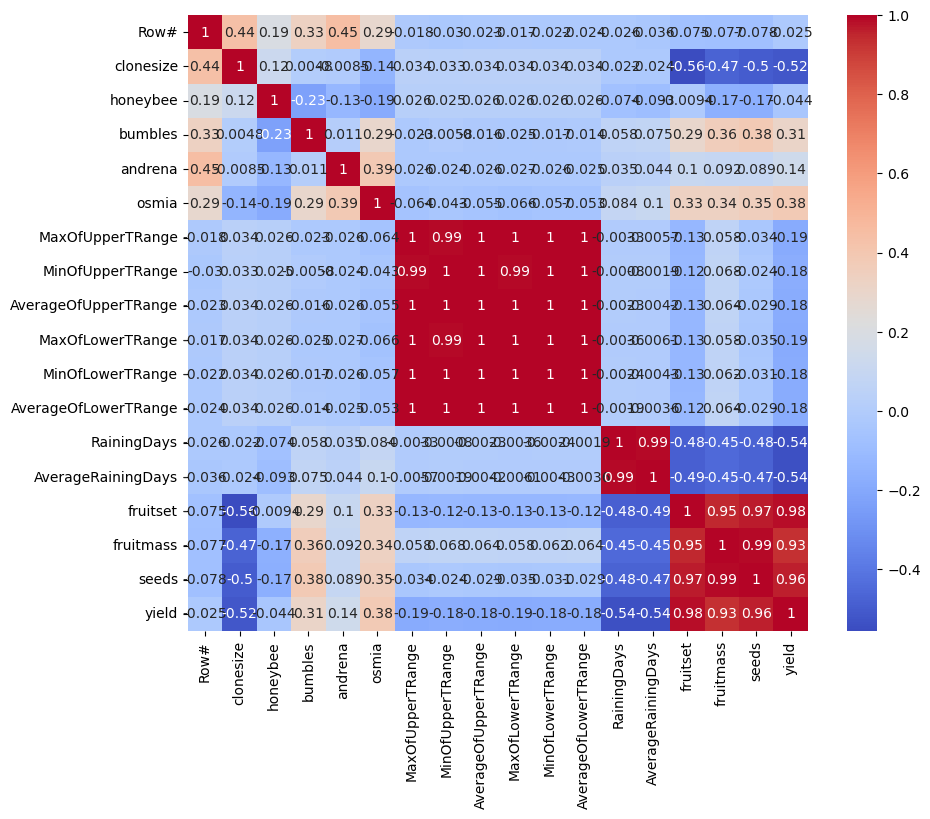

In [21]:
# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [22]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 23637.740571097682


In [25]:
# Save the model
joblib.dump(model, 'blueberry_yield_model.pkl')

with open('blueberry_yield_model.pkl', 'wb') as file:
    pickle.dump(model, file)